In [13]:
import os

# ✅ Change current directory to project root
os.chdir("../")

# Confirm directory
print("Current working directory:", os.getcwd())


Current working directory: D:\


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 🔧 Ensure you're in the correct root folder
project_root = "D:/clock-drift-fpga-project"
if os.getcwd() != project_root:
    os.chdir(project_root)

# 📥 Load data
drift_df = pd.read_csv("data/clock_drift.csv")
faulted_df = pd.read_csv("data/clock_drift_faulted.csv")
corrected_df = pd.read_csv("data/clock_drift_corrected.csv")
loss_df = pd.read_csv("output/loss_report.csv")
anomaly_df = pd.read_csv("output/anomaly_log.csv")


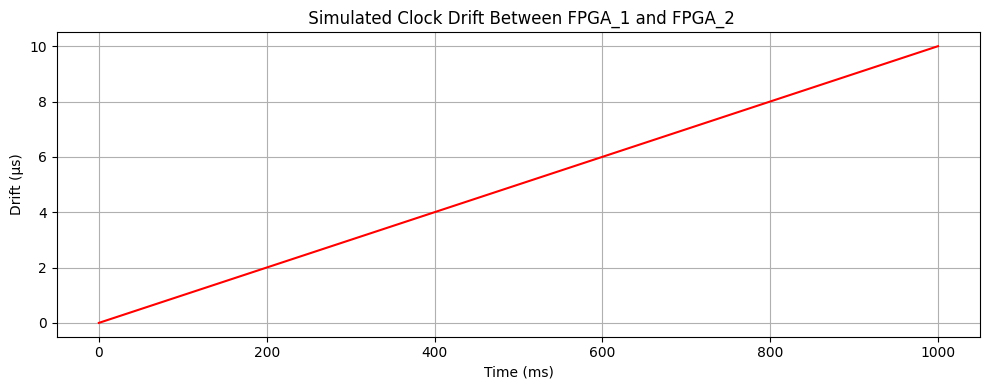

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(drift_df['time_sec'] * 1000, drift_df['drift_us'], color='red')
plt.title(" Simulated Clock Drift Between FPGA_1 and FPGA_2")
plt.xlabel("Time (ms)")
plt.ylabel("Drift (µs)")
plt.grid(True)
plt.tight_layout()
plt.show()


d:\clock-drift-fpga-project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


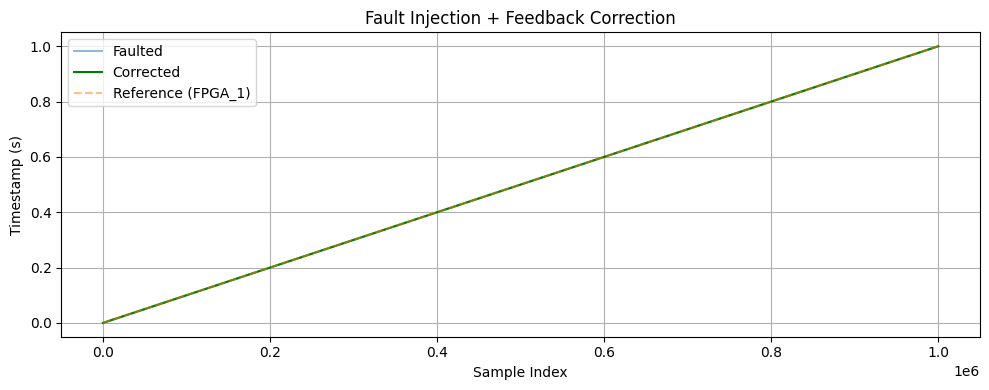

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(faulted_df["sample"], faulted_df["fpga_2_faulted"], label="Faulted", alpha=0.5)
plt.plot(corrected_df["sample"], corrected_df["fpga_2_corrected"], label="Corrected", color='green')
plt.plot(drift_df["sample"], drift_df["fpga_1_time"], label="Reference (FPGA_1)", linestyle='--', alpha=0.5)
plt.title("Fault Injection + Feedback Correction")
plt.xlabel("Sample Index")
plt.ylabel("Timestamp (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\rgout\AppData\Local\Temp\ipykernel_16844\659468817.py:23: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\clock-drift-fpga-project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


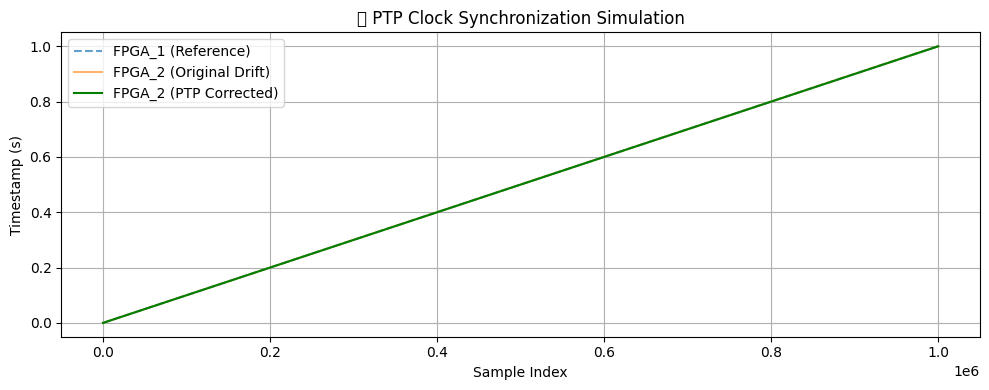

In [18]:
import os

# Always set working directory to project root
os.chdir("D:/clock-drift-fpga-project")

import pandas as pd

# Load your data
drift_df = pd.read_csv("data/clock_drift.csv")
fault_df = pd.read_csv("data/clock_drift_faulted.csv")
corrected_df = pd.read_csv("data/clock_drift_corrected.csv")

# Now plot
plt.figure(figsize=(10, 4))
plt.plot(drift_df["sample"], drift_df["fpga_1_time"], label="FPGA_1 (Reference)", linestyle="--", alpha=0.7)
plt.plot(drift_df["sample"], drift_df["fpga_2_time"], label="FPGA_2 (Original Drift)", alpha=0.6)
plt.plot(corrected_df["sample"], corrected_df["fpga_2_corrected"], label="FPGA_2 (PTP Corrected)", color='green')
plt.title("⏱ PTP Clock Synchronization Simulation")
plt.xlabel("Sample Index")
plt.ylabel("Timestamp (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



     path_1    path_2    path_3    path_4    path_5  sample  max_skew
0  0.349671  0.232151  0.334829  0.101943  0.252814       0  0.349671
1  0.286174  0.269450  0.328332  0.194501  0.401270       1  0.805499
2  0.364769  0.240262  0.206348  0.241297  0.280181       2  1.793652
3  0.452303  0.311042  0.357958  0.314967  0.309057       3  2.690943
4  0.276585  0.419718  0.150992  0.402416  0.371739       4  3.849008


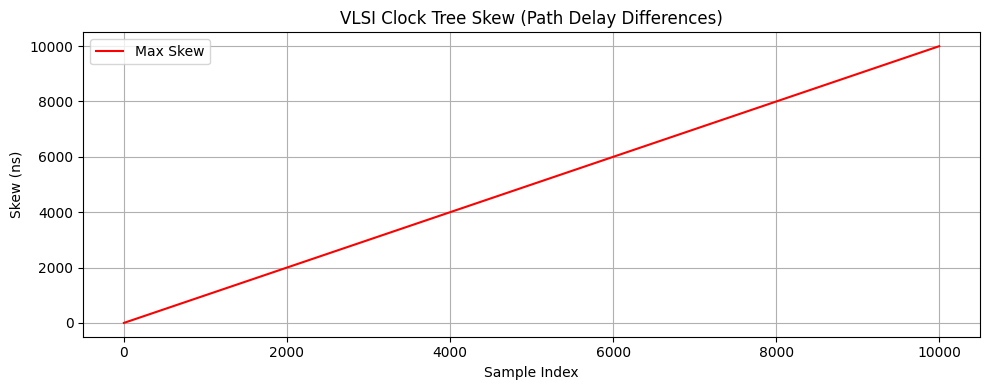

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set working directory to project root
project_root = "D:/clock-drift-fpga-project"
if os.getcwd() != project_root:
    os.chdir(project_root)

# Load VLSI clock skew data
vlsi_df = pd.read_csv("data/vlsi_clock_skew.csv")

# Verify the columns
print(vlsi_df.head())

# Plot max, min, and optionally average skew
plt.figure(figsize=(10, 4))
plt.plot(vlsi_df["sample"], vlsi_df["max_skew"], color='red', label="Max Skew")
if "min_skew" in vlsi_df.columns:
    plt.plot(vlsi_df["sample"], vlsi_df["min_skew"], color='blue', label="Min Skew", alpha=0.6)
if "avg_skew" in vlsi_df.columns:
    plt.plot(vlsi_df["sample"], vlsi_df["avg_skew"], color='green', label="Avg Skew", alpha=0.8)

plt.title("VLSI Clock Tree Skew (Path Delay Differences)")
plt.xlabel("Sample Index")
plt.ylabel("Skew (ns)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



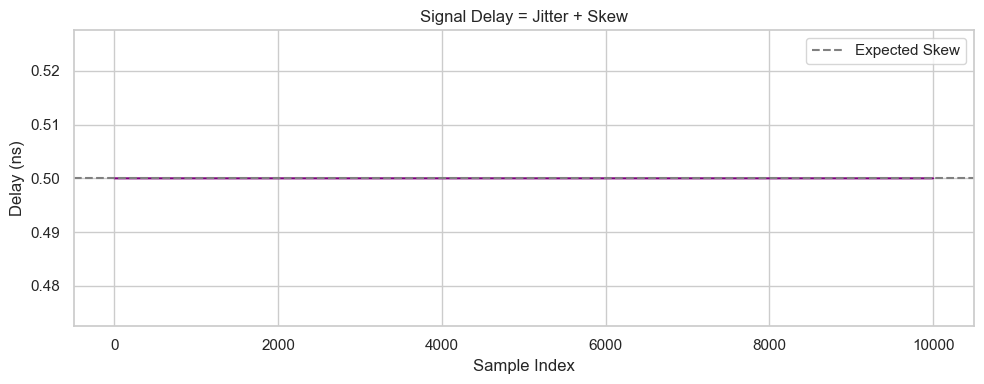

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(signal_df["sample"], signal_df["delay_ns"], color='purple')
plt.axhline(y=0.5, color='gray', linestyle='--', label="Expected Skew")
plt.title("Signal Delay = Jitter + Skew")
plt.xlabel("Sample Index")
plt.ylabel("Delay (ns)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


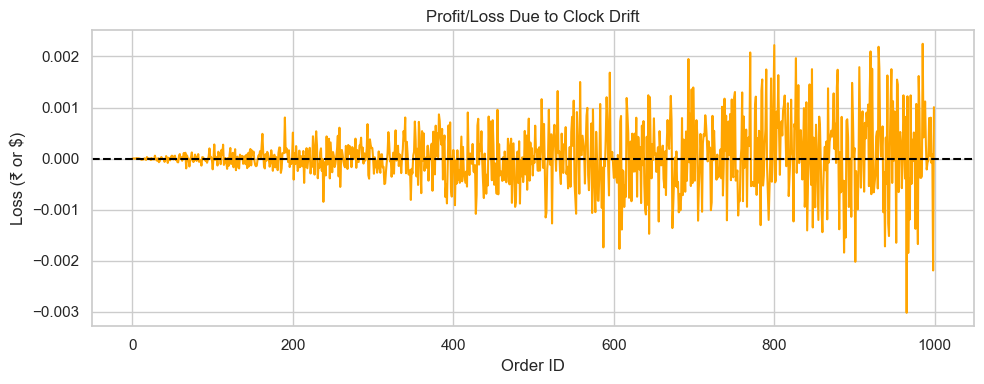

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(loss_df["order_id"], loss_df["loss_per_order"], color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Profit/Loss Due to Clock Drift")
plt.xlabel("Order ID")
plt.ylabel("Loss (₹ or $)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
if anomaly_df.empty:
    print("No order anomalies detected.")
else:
    plt.figure(figsize=(12, 4))
    sns.heatmap(
        anomaly_df[["position_in_stream", "current_order_id"]].T,
        cmap="Reds", annot=True, fmt=".0f", cbar=True
    )
    plt.title("🚨 Anomaly Heatmap (Order ID Violations)")
    plt.yticks([0.5, 1.5], ['Position', 'Order ID'], rotation=0)
    plt.tight_layout()
    plt.show()


No order anomalies detected.


In [ ]:
print("Dashboard Visualization Completed Successfully!")
print(f"Anomalies Detected: {len(anomaly_df)}")
print(f"Total Loss: {loss_df['loss_per_order'].sum():.4f}")


Dashboard Visualization Completed Successfully!
Anomalies Detected: 0
Total Loss: 0.0359
